# Perform PCA analysis on protein intensities across all samples for all proteins and each functional group

In [1]:
library("factoextra")
library(FactoMineR)

library(DEVis)
# load libraries (this gets ggplot2 and related libraries)
library(tidyverse)

# these are from Bioconductor
library(limma) 
library(edgeR) 
library(sva)

library(ggpubr)



Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    o

### Load datasets

In [2]:
comp_df = read.csv(file='../Intermediate data/labeled_IRS_proteins_GO.csv')
ref_df = read.csv(file='../Initial files/sample_ID_key.csv')


### PCA analysis of each sample including all protein intensities

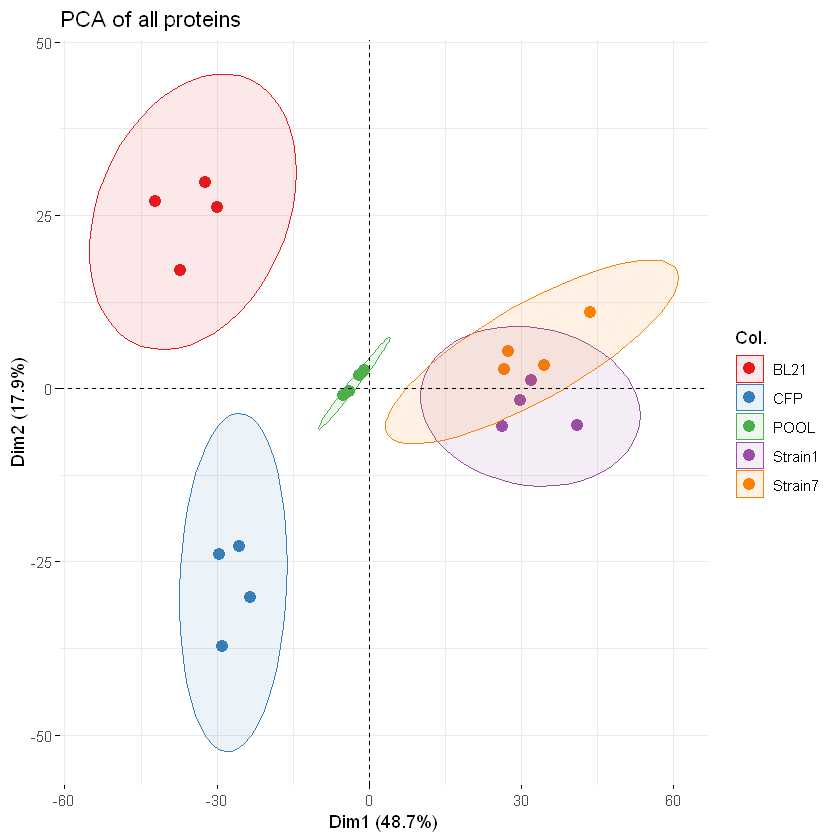

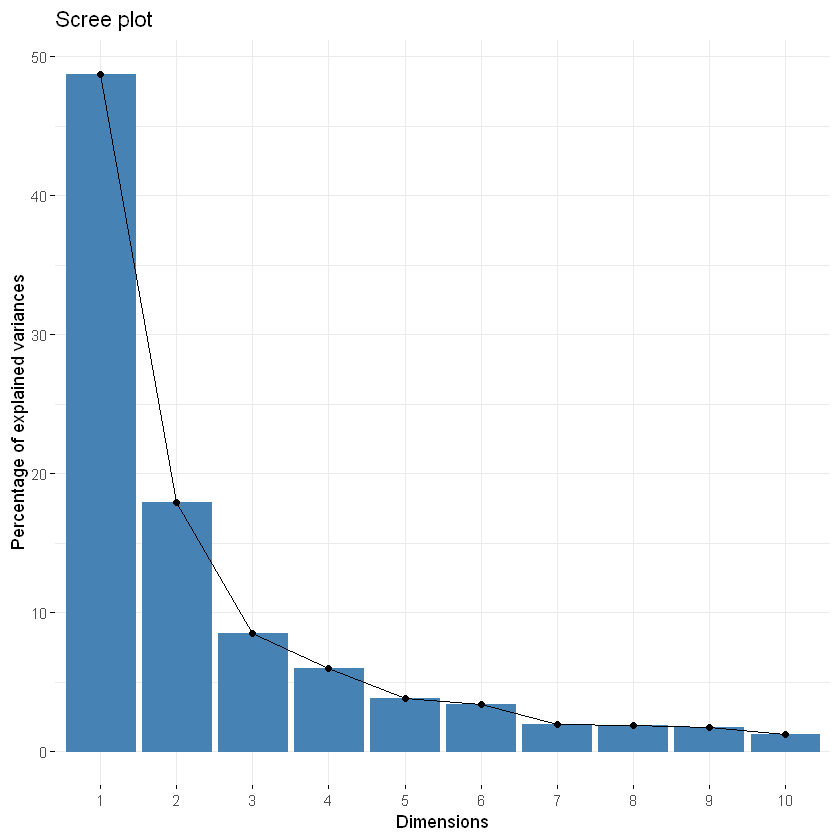

In [3]:
sample = comp_df %>%
        select(X,BL11,BL12,BL21,BL22,
               CF11,CF12,CF21,CF22,
               S111,S112,S121,S122,
               S711,S712,S721,S722,
               POOL1,POOL2,POOL3,POOL4)
sample = sample %>% column_to_rownames(var = "X")

# # transpose all but the first column (name)
trans <- as.data.frame(t(sample))

trans.label <- cbind(trans, sample_ID = rownames(trans))
trans.label = trans.label %>%
    left_join(ref_df,
         by=c('sample_ID'='sample_ID')) %>%
    column_to_rownames(var = "sample_ID")

res.pca <- prcomp(trans, scale = TRUE)

fviz_pca_ind(res.pca,
             col.ind = trans.label$extract,
             geom="point",
             pointshape = 19,
             pointsize = 3,
             palette = "Set1",
             repel = TRUE,     # Avoid text overlapping
             title = "PCA of all proteins",
             addEllipses = TRUE,ellipse.type = "t",
             mean.point = FALSE
             )

fviz_eig(res.pca)

### PCA analysis of each sample based on specific protein groups

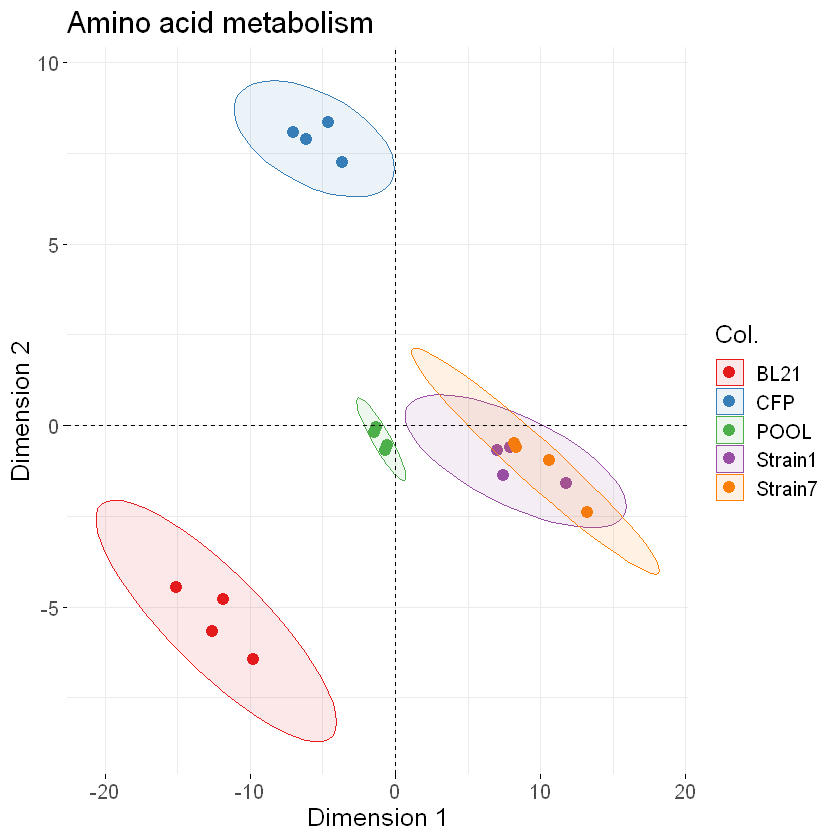

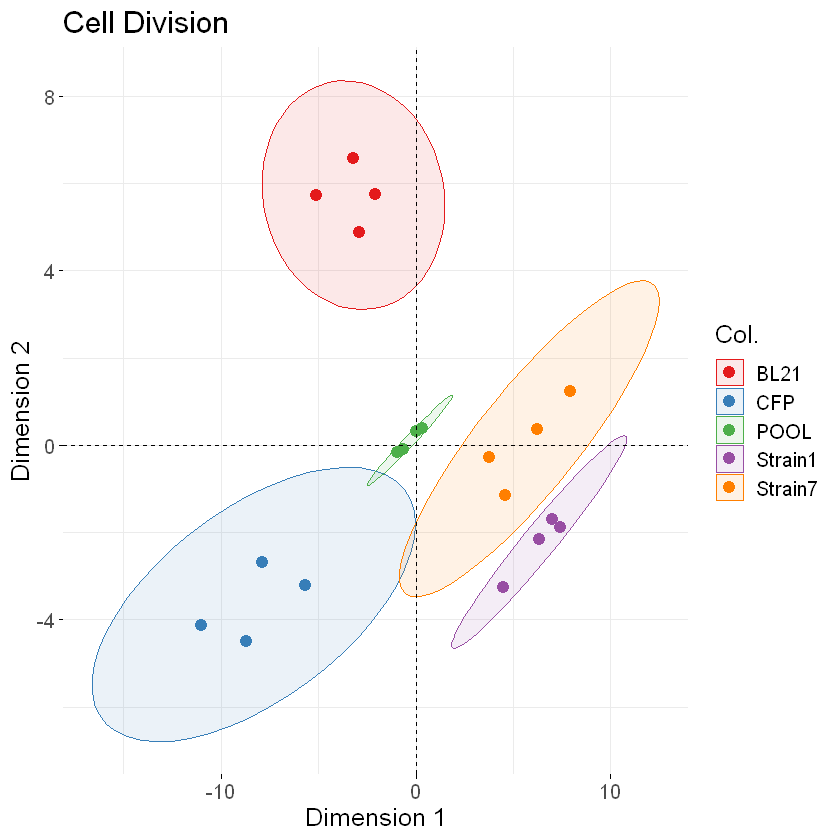

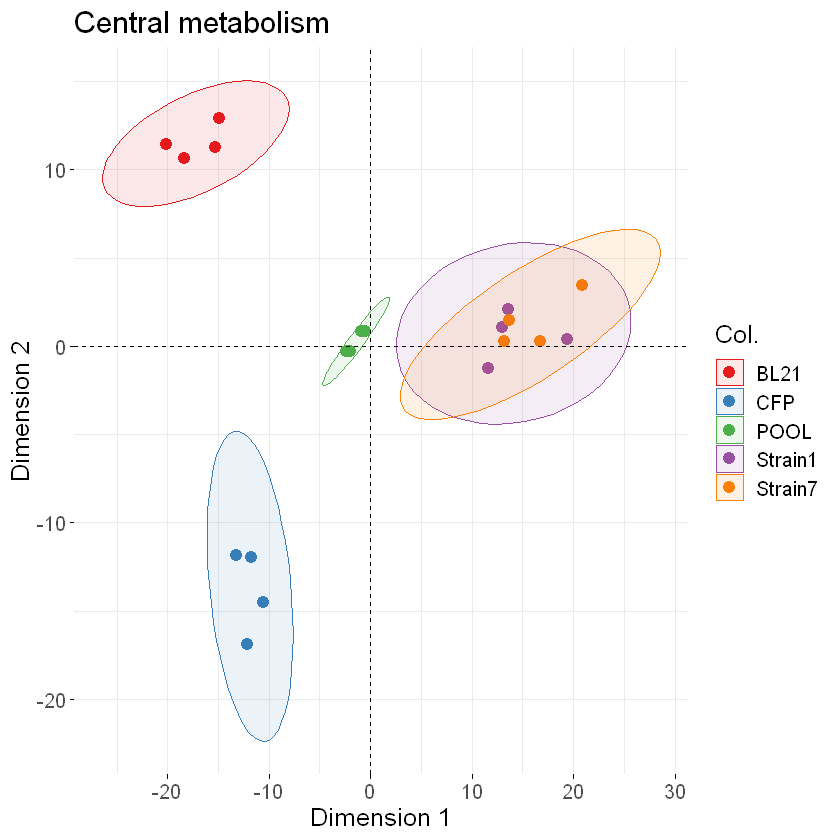

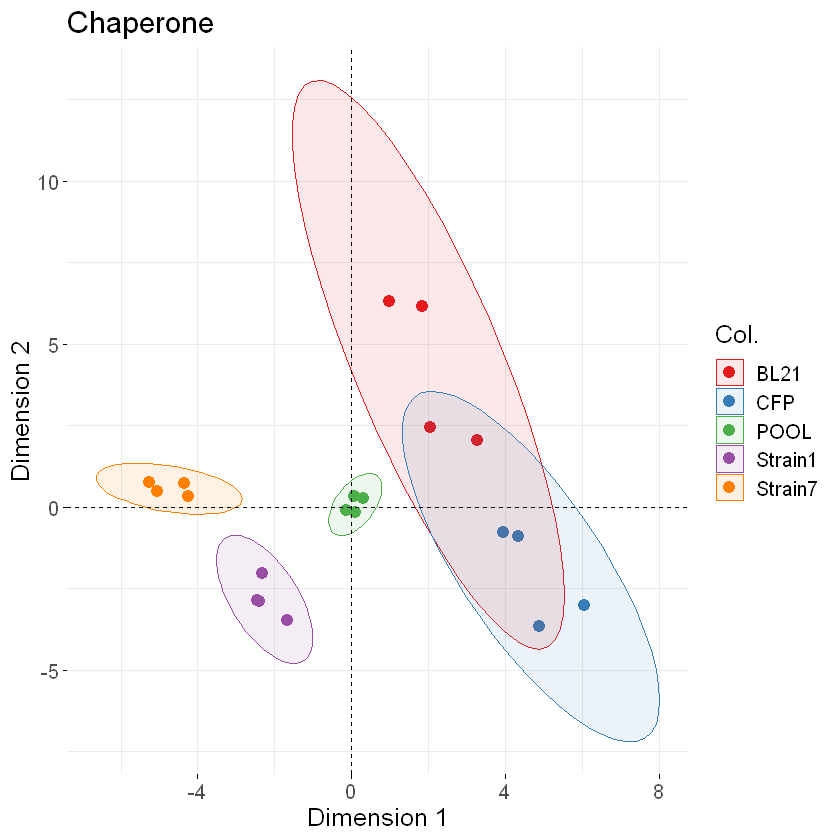

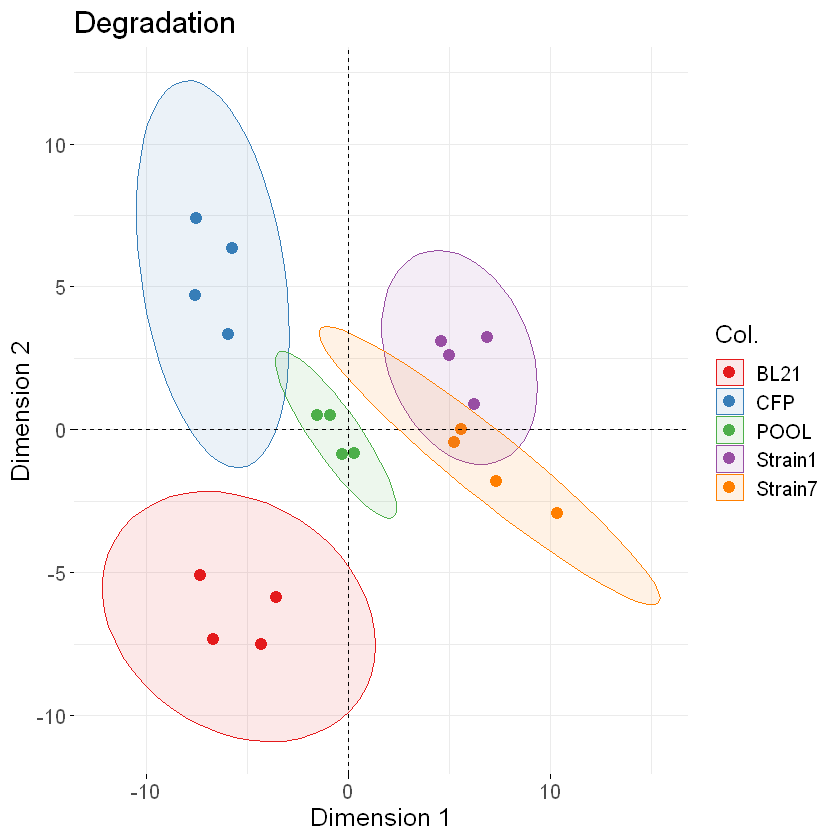

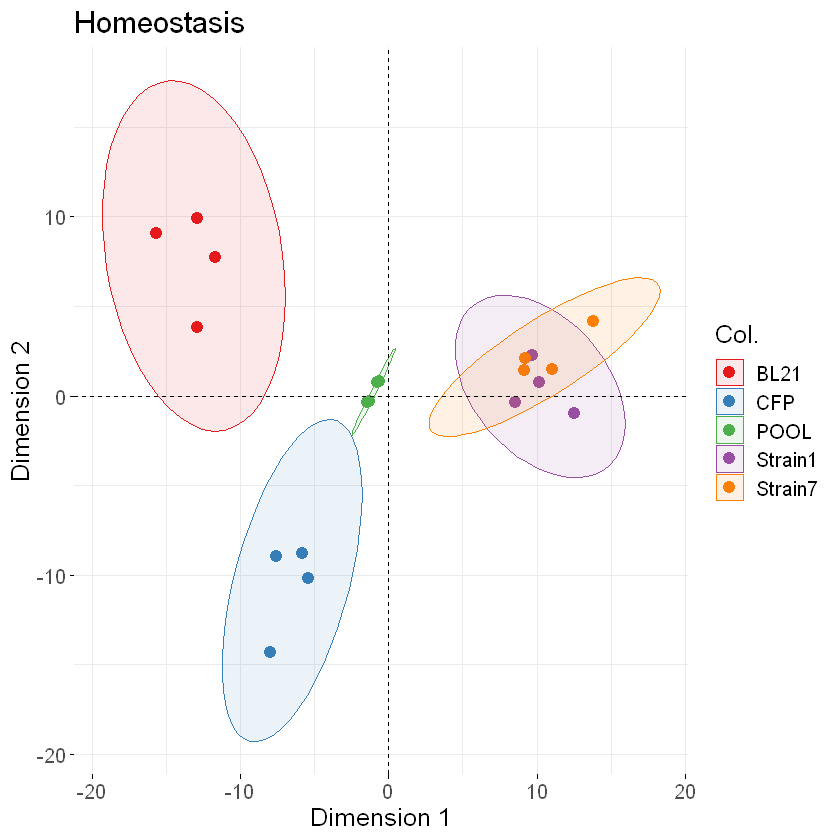

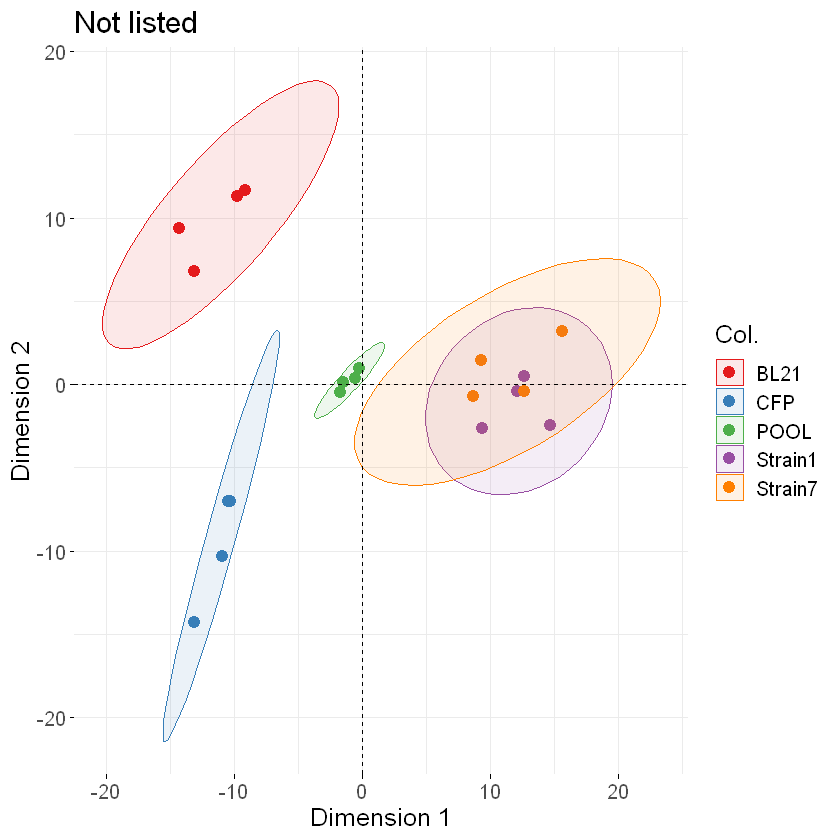

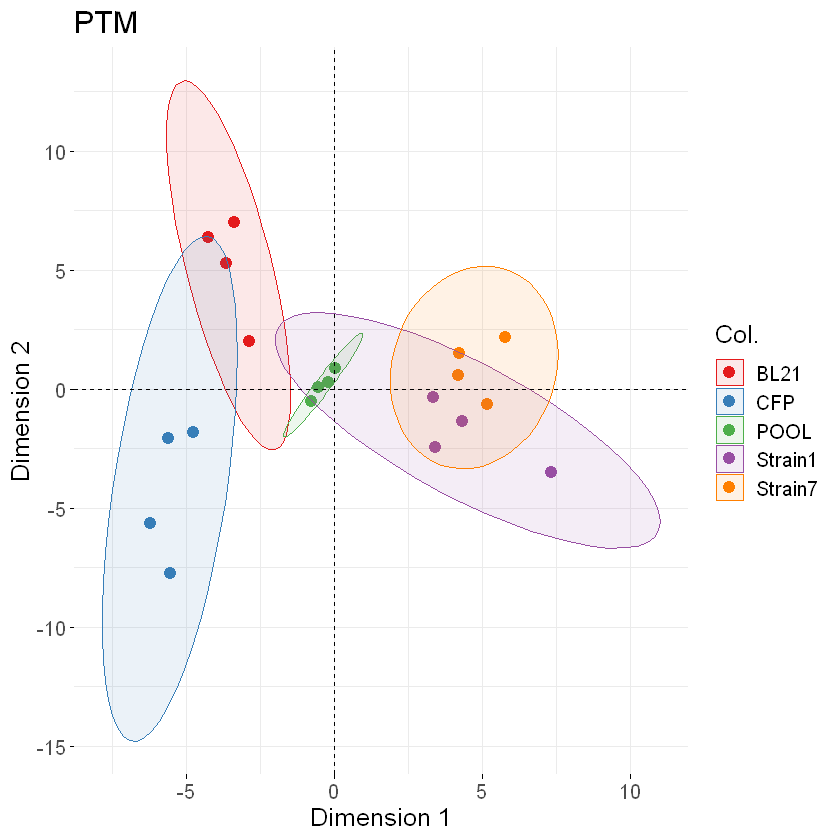

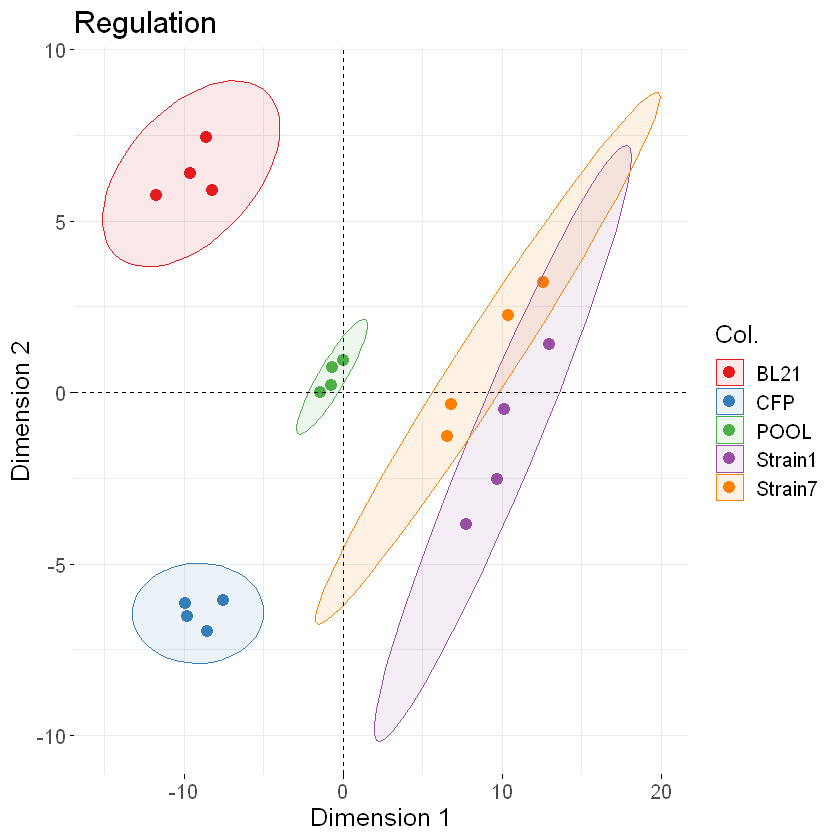

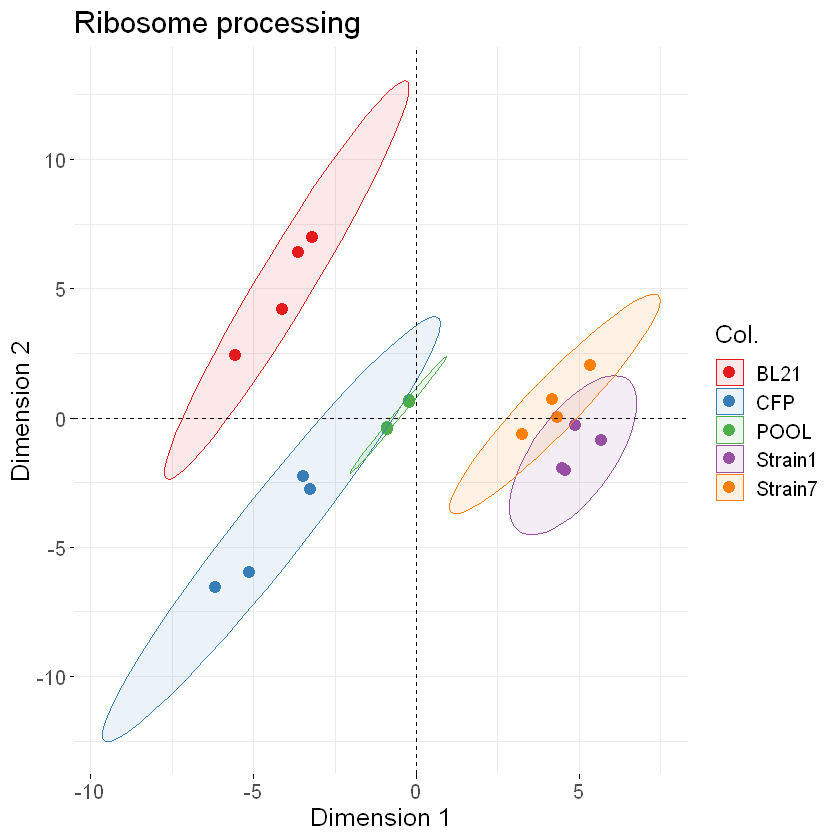

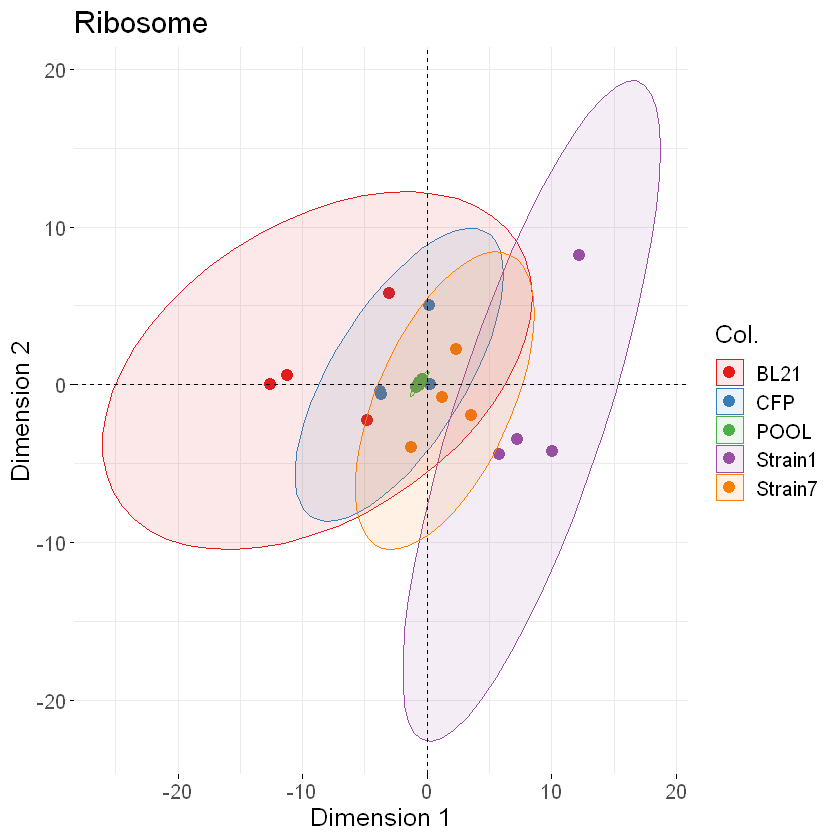

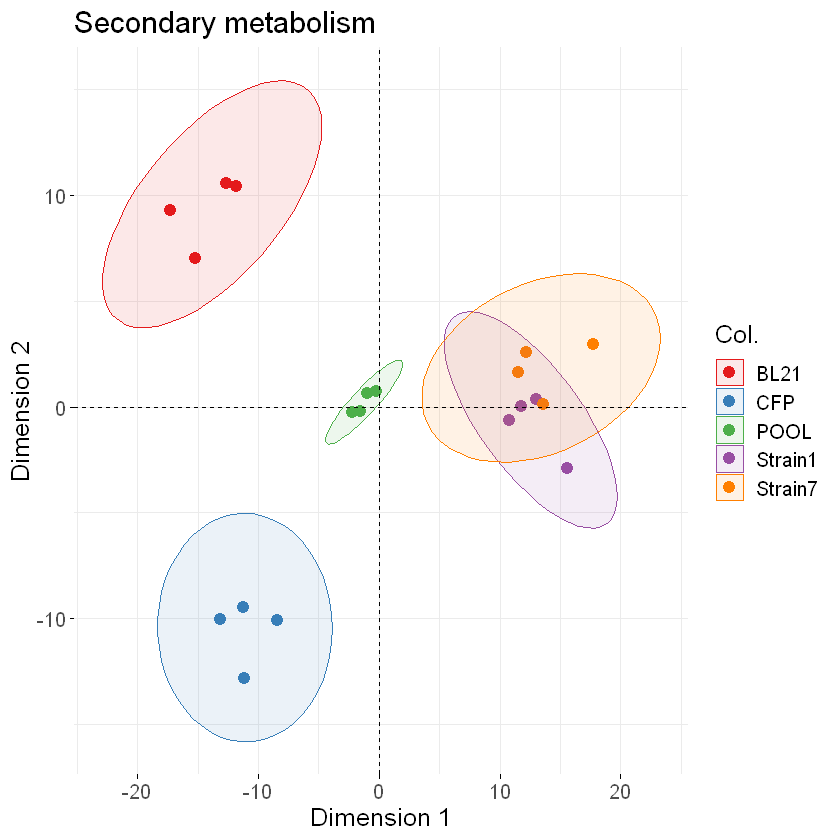

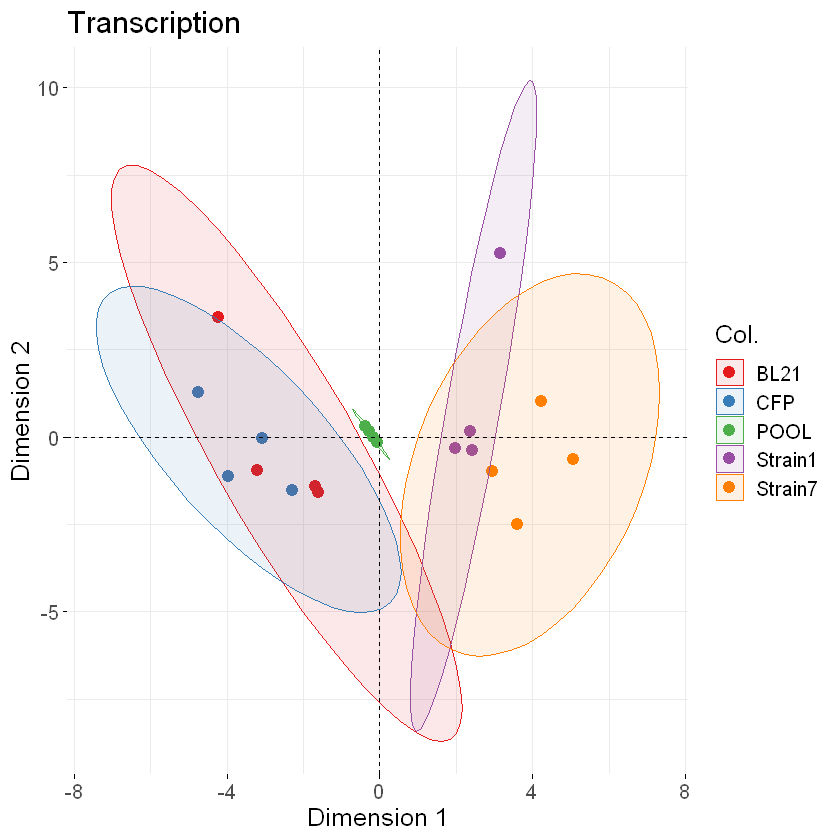

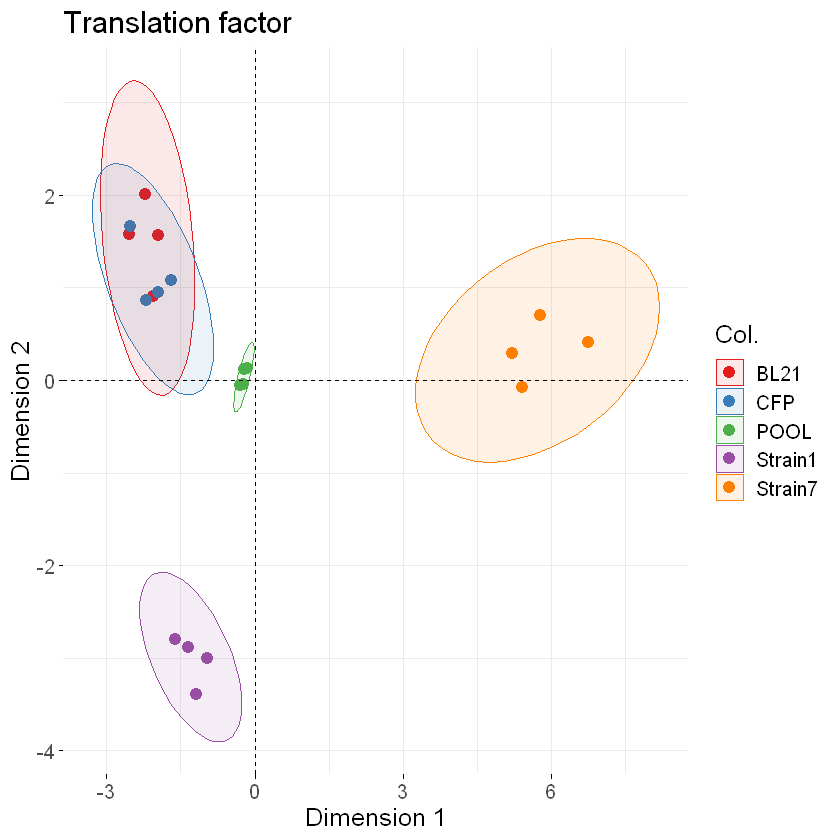

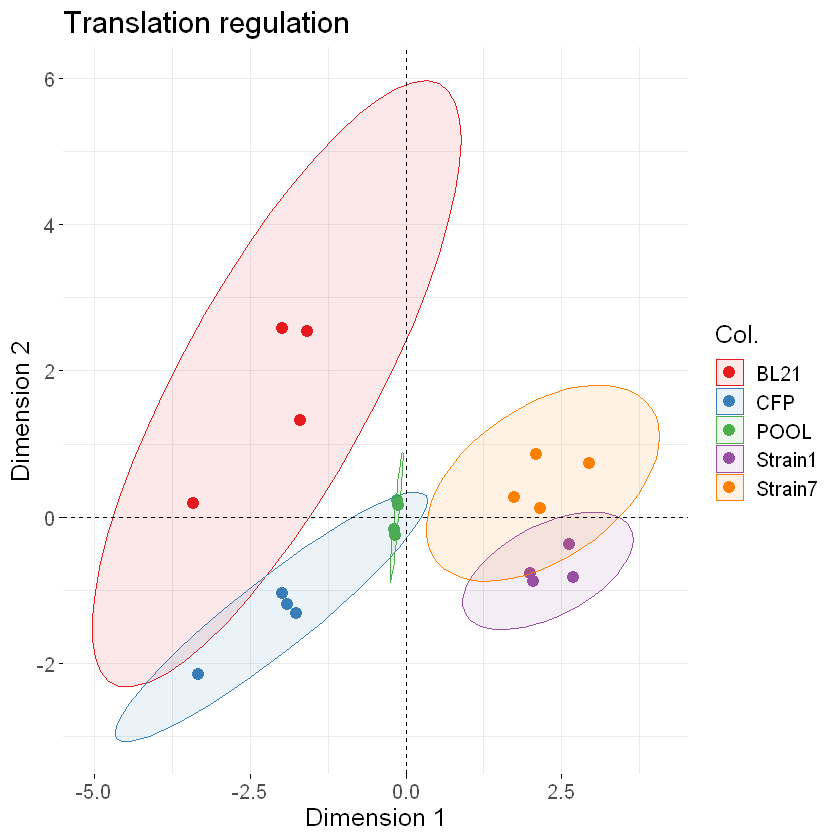

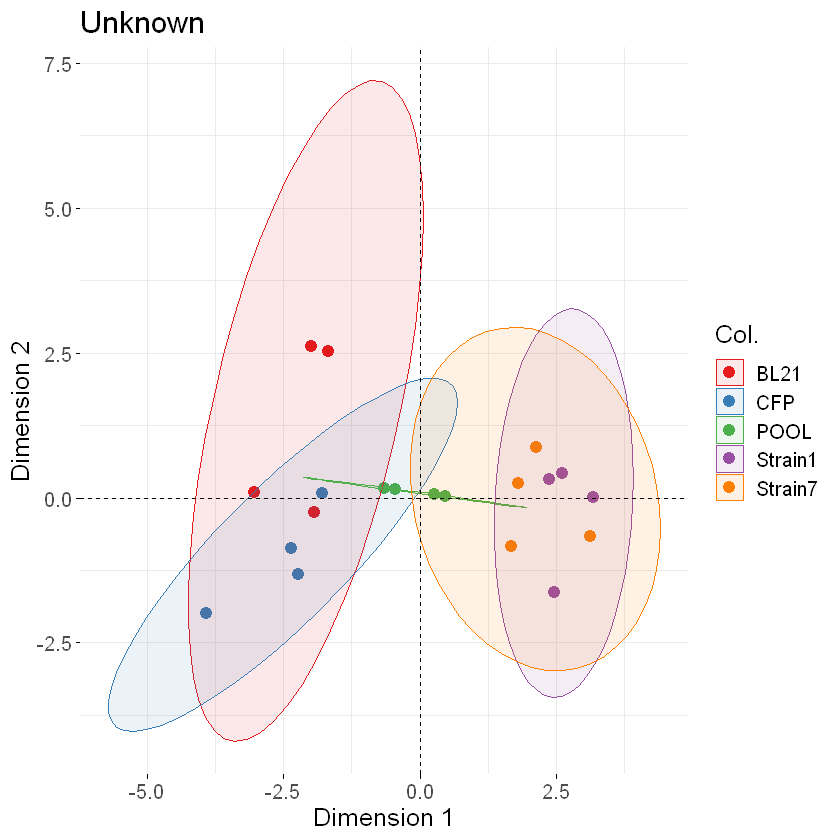

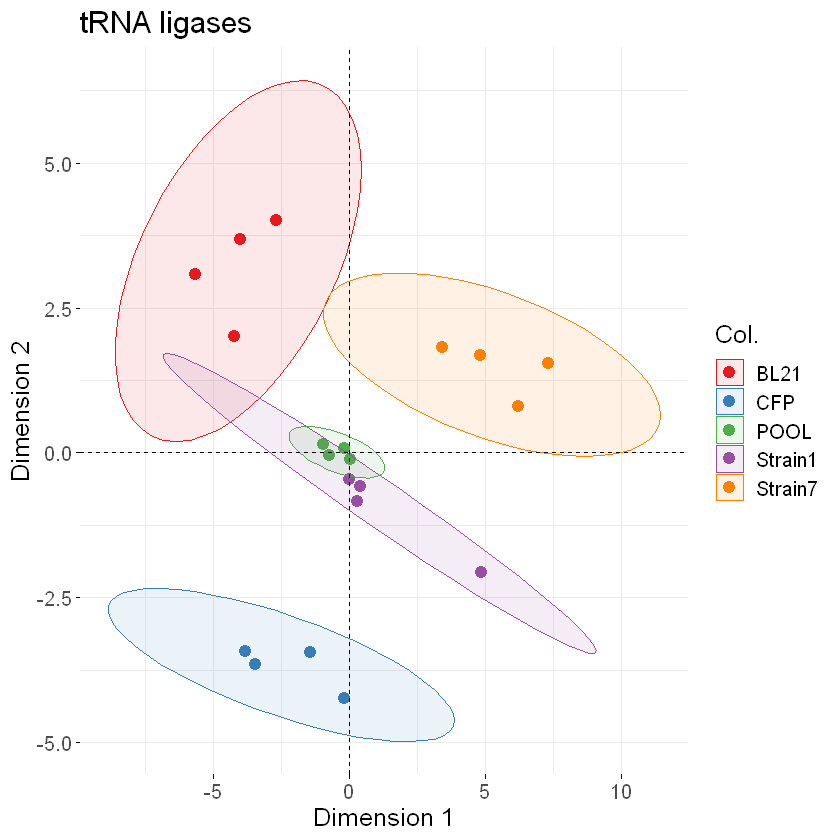

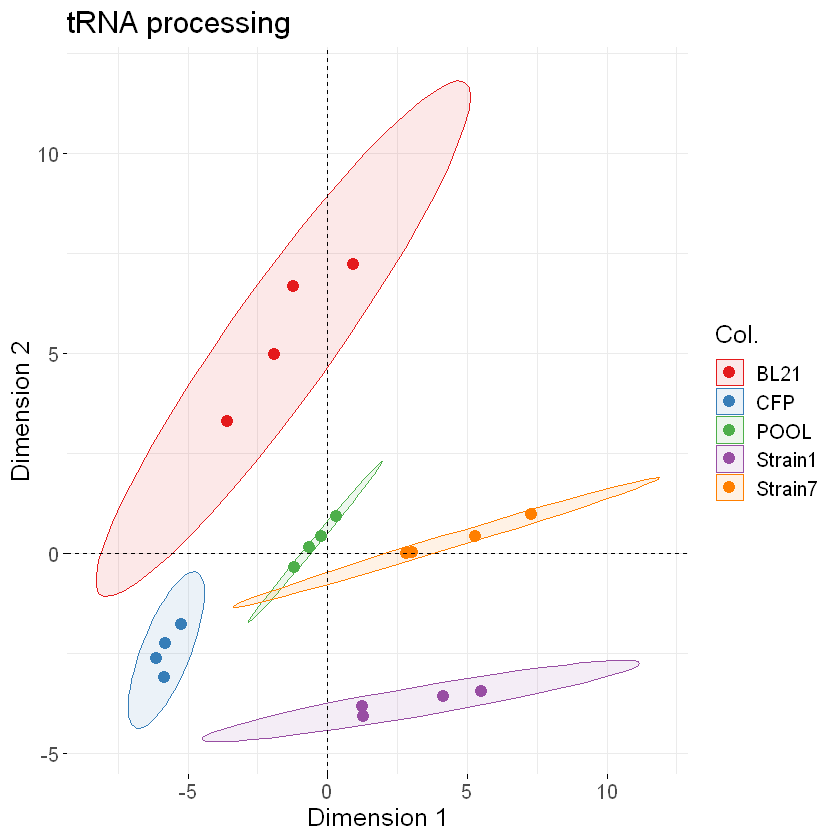

In [4]:
for (cate in unique(comp_df$category)){
    sample = comp_df %>%
        filter(category == cate) %>%
        select(X,BL11,BL12,BL21,BL22,
               CF11,CF12,CF21,CF22,
               S111,S112,S121,S122,
               S711,S712,S721,S722,
               POOL1,POOL2,POOL3,POOL4)
    sample=sample %>% column_to_rownames(var = "X")

    # # transpose all but the first column (name)
    trans <- as.data.frame(t(sample))
    
    trans.label <- cbind(trans, sample_ID = rownames(trans))
    trans.label = trans.label %>%
        left_join(ref_df,
             by=c('sample_ID'='sample_ID')) %>%
        column_to_rownames(var = "sample_ID")

    res.pca <- prcomp(trans, scale = TRUE)

    pca_plot = fviz_pca_ind(res.pca,
                 col.ind = trans.label$extract,
                 geom="point",
                 pointshape = 19,
                 pointsize = 3,
                 palette = "Set1",
                 repel = TRUE,     # Avoid text overlapping
                 title = cate,
                 addEllipses = TRUE,ellipse.type = "t",
                 mean.point = FALSE
                 )
    pca_plot = pca_plot + 
        xlab('Dimension 1') +
        ylab('Dimension 2') +
#         theme(legend.position="none",
#               text = element_text(size=15))
        theme(text = element_text(size=15))
    
    print(pca_plot)
    }
